   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


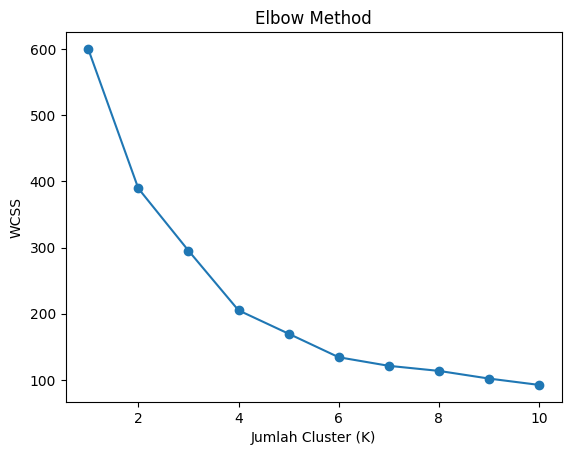

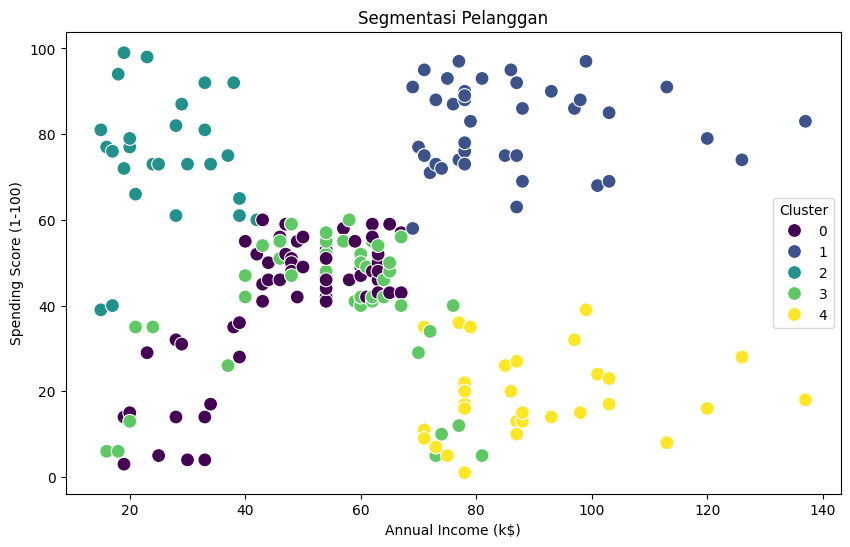

In [2]:
# Import semua library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # <-- Tambahkan ini
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# Load data
df = pd.read_csv("Mall_Customers.csv")

# EDA
print(df.head())

# Preprocessing
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Clustering dengan K-Means
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Training model
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

# Simpan model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Visualisasi
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='viridis', s=100)
plt.title("Segmentasi Pelanggan")
plt.savefig('cluster_plot.png')
plt.show()